In [4]:
# 최종본 2024.11.27 김동영
import pandas as pd

In [5]:
df1 = pd.read_csv("건강보험심사평가원_시군구별 성별 연령군별 치매질환 진료 통계 2023.csv",encoding = 'EUC-KR')
df1
# 치매환자 통계

,진료년도,시도,시군구,성별,연령군,환자수,입내원일수,요양급여비용총액
0,2023,서울,강남구,남,0~9세,0,0,0
1,2023,서울,강남구,남,10~19세,0,0,0
2,2023,서울,강남구,남,20~29세,0,0,0
3,2023,서울,강남구,남,30~39세,0,0,0
4,2023,서울,강남구,남,40~49세,0,0,0
...,...,...,...,...,...,...,...,...
5583,2023,세종,세종시,여,60~69세,108,1620,115079840
5584,2023,세종,세종시,여,70~79세,395,5628,390048730
5585,2023,세종,세종시,여,80~89세,1117,27709,1993346900
5586,2023,세종,세종시,여,90~99세,316,14473,1099869810


In [6]:
df2 = pd.read_csv('지역별인구.csv',encoding='cp949')
df2.drop(columns=['2023년_세대수'],inplace=True)
df2.drop(columns=['2023년_세대당 인구'],inplace=True)
df2.drop(columns=['2023년_남자 인구수'],inplace=True)
df2.drop(columns=['2023년_여자 인구수'],inplace=True)
df2.drop(columns=['2023년_남여 비율'],inplace=True)
df2 = df2.rename(columns={'행정구역': '시도'})
df2['2023년_총인구수'] = df2['2023년_총인구수'].str.replace(',', '').astype(int)
df2 = df2[df2['시도'].str.contains('전국') == False]


df2['시도'] = df2['시도'].str.split(' ').str[0]  


df2['시도'] = df2['시도'].replace({
    "서울특별시": "서울", "부산광역시": "부산", "대구광역시": "대구",
    "인천광역시": "인천", "광주광역시": "광주", "대전광역시": "대전",
    "울산광역시": "울산", "세종특별자치시": "세종", "강원특별자치도": "강원",
    "충청북도": "충북", "충청남도": "충남", "전라북도": "전북",
    "전라남도": "전남", "경상북도": "경북", "경상남도": "경남",
    "제주특별자치도": "제주","경기도":"경기"
})
df2
# 지역별 인구 통계 불러오고, 필요없는 행 삭제 후, df1과 행정구역 이름 불일치 문제를 해결하기 위해 행정구역 시도 이름 수정



,시도,2023년_총인구수
1,서울,9386034
2,부산,3293362
3,대구,2374960
4,인천,2997410
5,광주,1419237
6,대전,1442216
7,울산,1103661
8,세종,386525
9,경기,13630821
10,강원,1527807


In [7]:
age_idx = ['0~9세', '10~19세', '20~29세', '30~39세', '40~49세','50~59세','60~69세','70~79세',\
           '80~89세','90~99세']
age_df1= []
for i in range(10):
    age_df1.append(df1[df1['연령군']== age_idx[i]])

age_df1[7]
# 나이대별로 분리

,진료년도,시도,시군구,성별,연령군,환자수,입내원일수,요양급여비용총액
7,2023,서울,강남구,남,70~79세,507,2857,308115300
18,2023,서울,강남구,여,70~79세,928,3851,389854610
29,2023,서울,강동구,남,70~79세,1385,11247,1140804820
40,2023,서울,강동구,여,70~79세,1047,9200,864415390
51,2023,서울,강서구,남,70~79세,322,2663,231734520
...,...,...,...,...,...,...,...,...
5540,2023,제주,서귀포시,여,70~79세,326,2033,106516240
5551,2023,제주,제주시,남,70~79세,589,8623,725658720
5562,2023,제주,제주시,여,70~79세,931,8918,728178760
5573,2023,세종,세종시,남,70~79세,227,3389,241562830


In [8]:
age_total_group = df1.groupby('연령군')['환자수'].sum().reset_index()
age_total_group
# 연령군별 환자수로 묶고, 인덱스 초기화


,연령군,환자수
0,0~9세,0
1,100세 이상,2719
2,10~19세,0
3,20~29세,0
4,30~39세,0
5,40~49세,91
6,50~59세,4524
7,60~69세,41116
8,70~79세,180483
9,80~89세,428388


In [9]:
sex_total_group = df1.groupby('성별')['환자수'].sum().reset_index()
sex_total_group
# 성별 환자수

,성별,환자수
0,남,225089
1,여,554106


In [10]:
province_total_group = df1.groupby('시도')['환자수'].sum().reset_index()
province_total_group['환자수'] = province_total_group['환자수']
province_total_group = pd.merge(province_total_group,df2,on ="시도")
province_total_group['인구당 환자비율']=(province_total_group['환자수']/province_total_group['2023년_총인구수']*100)
province_total_group
# 시도별 환자수와 인구수 문서를 합치고, 인구당 환자비율이라는 새로운 열을 만들어서 환자수를 해당 지역의 총 인구수로 나눔


,시도,환자수,2023년_총인구수,인구당 환자비율
0,강원,22397,1527807,1.465957
1,경기,167431,13630821,1.228327
2,경남,60175,3251158,1.850879
3,경북,58359,2554324,2.284714
4,광주,25553,1419237,1.800474
5,대구,45280,2374960,1.906558
6,대전,22510,1442216,1.560793
7,부산,53345,3293362,1.619773
8,서울,89335,9386034,0.951786
9,세종,2721,386525,0.703965


In [ ]:
province_total_price = df1.groupby('시도')['요양급여비용총액'].sum().reset_index()
province_total_price['요양급여비용총액'] = province_total_price['요양급여비용총액']
province_total_price=pd.merge(province_total_price,df2,on='시도')
province_total_price['1인당 요양급여비용'] = (province_total_price['요양급여비용총액']/province_total_price['2023년_총인구수']*100).astype(int)
province_total_price
# 총 인구수 문서와 합치고 1인당 요양급여 열을 새로 생성함. 그리고 숫자가 크고, 데이터타입이 float이어서 지수표기법으로 나타나서 int형으로 형변환을 시킴



,시도,요양급여비용총액,2023년_총인구수,1인당 요양급여비용
0,강원,24500300680,1527807,1603625
1,경기,285640629520,13630821,2095549
2,경남,230333693510,3251158,7084666
3,경북,180593896420,2554324,7070124
4,광주,133822206790,1419237,9429165
5,대구,113654662870,2374960,4785540
6,대전,57575462480,1442216,3992152
7,부산,299447349820,3293362,9092451
8,서울,107557169650,9386034,1145927
9,세종,4315323530,386525,1116440


In [ ]:
province_days_mean = df1.groupby('시도')['입내원일수'].mean()
province_days_mean
# 시도별 입내원일수 평균값

시도
강원      816.439394
경기     3515.705051
경남     5818.123967
경북     4222.187500
광주    14162.690909
대구     6994.454545
대전     6430.836364
부산    10151.494318
서울     2127.945455
세종     2730.000000
울산     7327.400000
인천     3731.895455
전남     4358.886364
전북     5981.075758
제주     3260.977273
충남     3625.232955
충북     1736.821429
Name: 입내원일수, dtype: float64

In [ ]:
age_days_mean = df1.groupby('연령군')['입내원일수'].mean()
age_days_mean = age_days_mean.astype(int)
age_days_mean
# 원본 데이터는 시군구별 연령군별 입내원일수의 총합인데 이걸 각 시군구별 입내월 일수 합계의 평균값을 구함


연령군
0~9세           0
100세 이상      322
10~19세         0
20~29세         0
30~39세         0
40~49세         0
50~59세       188
60~69세      1864
70~79세      7615
80~89세     27262
90~99세     11895
Name: 입내원일수, dtype: int64

In [ ]:
age_price_mean = df1.groupby('연령군')['요양급여비용총액'].mean().astype(int)
age_price_mean
# 연령군별 요양급여 비용의 총액

연령군
0~9세                0
100세 이상      25688033
10~19세              0
20~29세              0
30~39세              0
40~49세          81733
50~59세       17355279
60~69세      164338473
70~79세      651209750
80~89세     2239704700
90~99세      960426901
Name: 요양급여비용총액, dtype: int64

In [23]:

import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib
shapefile_path = "skorea-provinces-2011.shp"
map_data = gpd.read_file(shapefile_path, encoding='euc-kr')
map_data
# geopanda등 시각화 라이브러리 호출

,code,name,name_eng,base_year,geometry
0,39,제주특별자치도,Jeju,2011,"MULTIPOLYGON (((131786.371 -42348.449, 131746...."
1,38,경상남도,Gyeongsangnam-do,2011,"MULTIPOLYGON (((312243.984 122605.755, 312237...."
2,37,경상북도,Gyeongsangbuk-do,2011,"MULTIPOLYGON (((424181.541 246951.289, 424169...."
3,36,전라남도,Jeollanam-do,2011,"MULTIPOLYGON (((234510.596 56601.881, 234468.5..."
4,35,전라북도,Jeollabuk-do,2011,"MULTIPOLYGON (((148022.908 216637.962, 148017...."
5,34,충청남도,Chungcheongnam-do,2011,"MULTIPOLYGON (((164170.108 276811.165, 164148...."
6,33,충청북도,Chungcheongbuk-do,2011,"POLYGON ((286869.626 417782.462, 286921.31 417..."
7,32,강원도,Gangwon-do,2011,"MULTIPOLYGON (((353118.159 501845.806, 353099...."
8,31,경기도,Gyeonggi-do,2011,"MULTIPOLYGON (((153403.93 397833.766, 153361.9..."
9,26,울산광역시,Ulsan,2011,"MULTIPOLYGON (((421462.995 224875.105, 421476...."


In [24]:
map_data.loc[map_data['name'] == '제주특별자치도', 'name'] = '제주'
map_data.loc[map_data['name'] == '경상남도', 'name'] = '경남'
map_data.loc[map_data['name'] == '경상북도', 'name'] = '경북'
map_data.loc[map_data['name'] == '전라남도', 'name'] = '전남'
map_data.loc[map_data['name'] == '전라북도', 'name'] = '전북'
map_data.loc[map_data['name'] == '충청남도', 'name'] = '충남'
map_data.loc[map_data['name'] == '충청북도', 'name'] = '충북'
map_data.loc[map_data['name'] == '강원도', 'name'] = '강원'
map_data.loc[map_data['name'] == '경기도', 'name'] = '경기'
map_data.loc[map_data['name'] == '울산광역시', 'name'] = '울산'
map_data.loc[map_data['name'] == '대전광역시', 'name'] = '대전'
map_data.loc[map_data['name'] == '광주광역시', 'name'] = '광주'
map_data.loc[map_data['name'] == '인천광역시', 'name'] = '인천'
map_data.loc[map_data['name'] == '대구광역시', 'name'] = '대구'
map_data.loc[map_data['name'] == '부산광역시', 'name'] = '부산'
map_data.loc[map_data['name'] == '서울특별시', 'name'] = '서울'
map_data
# geopandas 우리나라 시도의 이름을 변경

,code,name,name_eng,base_year,geometry
0,39,제주,Jeju,2011,"MULTIPOLYGON (((131786.371 -42348.449, 131746...."
1,38,경남,Gyeongsangnam-do,2011,"MULTIPOLYGON (((312243.984 122605.755, 312237...."
2,37,경북,Gyeongsangbuk-do,2011,"MULTIPOLYGON (((424181.541 246951.289, 424169...."
3,36,전남,Jeollanam-do,2011,"MULTIPOLYGON (((234510.596 56601.881, 234468.5..."
4,35,전북,Jeollabuk-do,2011,"MULTIPOLYGON (((148022.908 216637.962, 148017...."
5,34,충남,Chungcheongnam-do,2011,"MULTIPOLYGON (((164170.108 276811.165, 164148...."
6,33,충북,Chungcheongbuk-do,2011,"POLYGON ((286869.626 417782.462, 286921.31 417..."
7,32,강원,Gangwon-do,2011,"MULTIPOLYGON (((353118.159 501845.806, 353099...."
8,31,경기,Gyeonggi-do,2011,"MULTIPOLYGON (((153403.93 397833.766, 153361.9..."
9,26,울산,Ulsan,2011,"MULTIPOLYGON (((421462.995 224875.105, 421476...."


In [ ]:
map_data = map_data.rename(columns={'name': '시도'})
merged_data = map_data.merge(province_total_group, on='시도')
merged_data['환자수'] = merged_data['환자수'].replace(',', '', regex=True)
merged_data['환자수'] = merged_data['환자수'].astype(int)
# 시도별 환자수 지도 시각화

<Figure size 1200x1200 with 0 Axes>

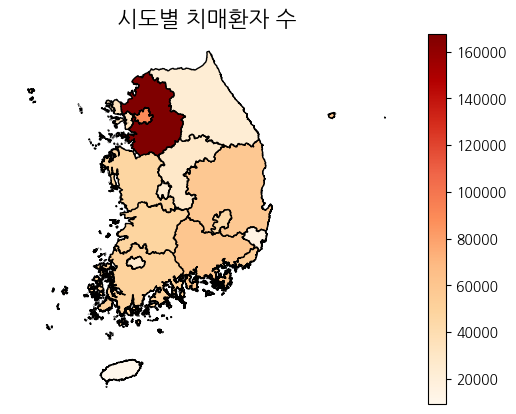

In [28]:
plt.figure(figsize=(12, 12))
ax = merged_data.plot(
    column='환자수',
    cmap='OrRd',
    legend=True,
    edgecolor='black',
    missing_kwds={
        "color": "lightgrey",
        "label": "No data"
    }
)
ax.set_title("시도별 치매환자 수", fontsize=16)
ax.set_axis_off()

plt.show()
# 그래프 생성

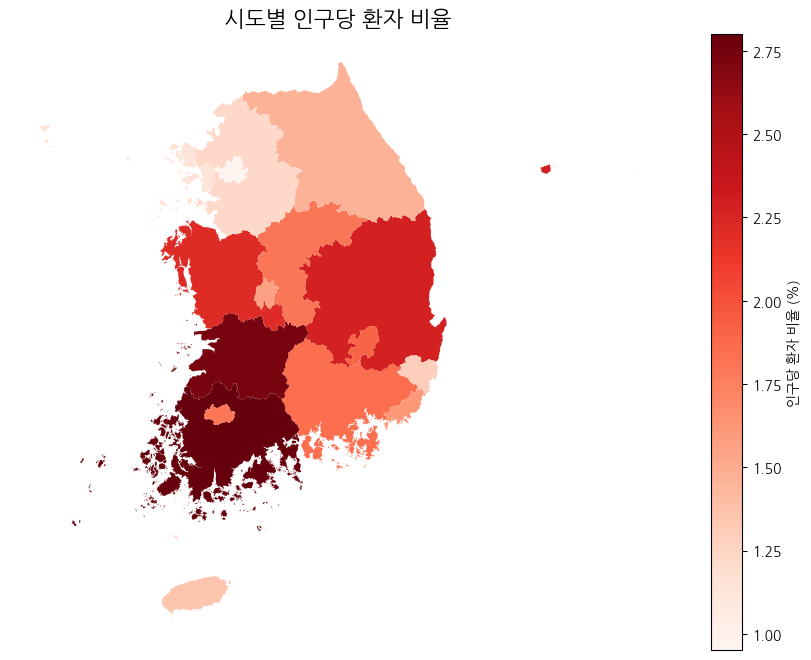

In [ ]:
map_data = map_data.rename(columns={"name": "시도"})
map_data = map_data.merge(province_total_group, on="시도")


fig, ax = plt.subplots(1, 1, figsize=(12, 8))
map_data.plot(
    column='인구당 환자비율',  
    cmap='Reds',             
    legend=True,             
    legend_kwds={'label': "인구당 환자 비율 (%)"},  
    ax=ax
)
plt.title("시도별 인구당 환자 비율", fontsize=16)
plt.axis("off")  
plt.show()
# 시도별 인구당 환자비율 시각화

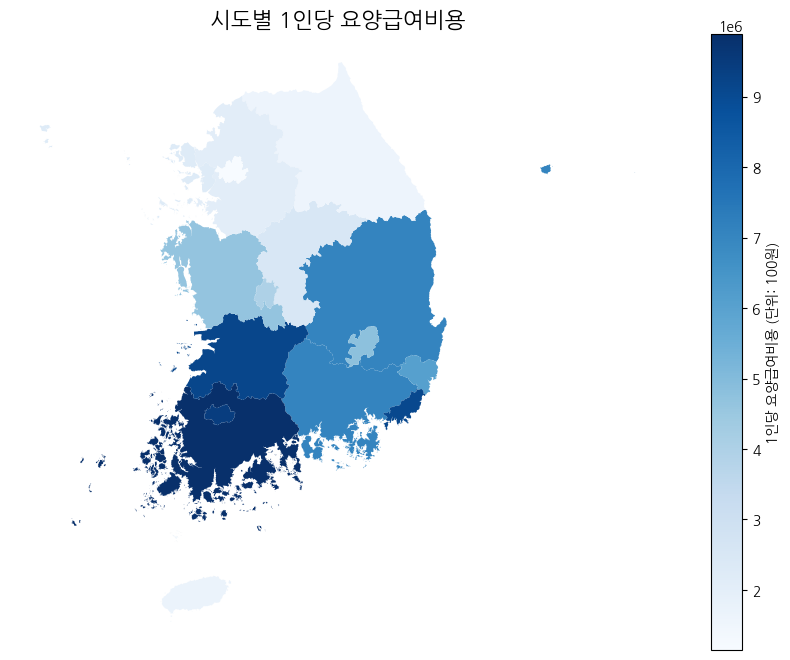

In [ ]:
map_data = map_data.rename(columns={"name": "시도"}) 
map_data = map_data.merge(province_total_price, on="시도")


fig, ax = plt.subplots(1, 1, figsize=(12, 8))
map_data.plot(
    column='1인당 요양급여비용',  
    cmap='Blues',              
    legend=True,               
    legend_kwds={'label': "1인당 요양급여비용 (단위: 100원)"},  
    ax=ax
)


plt.title("시도별 1인당 요양급여비용", fontsize=16)
plt.axis("off")  
plt.show()
# 시도별 1인당 요양급여 비용 시각화

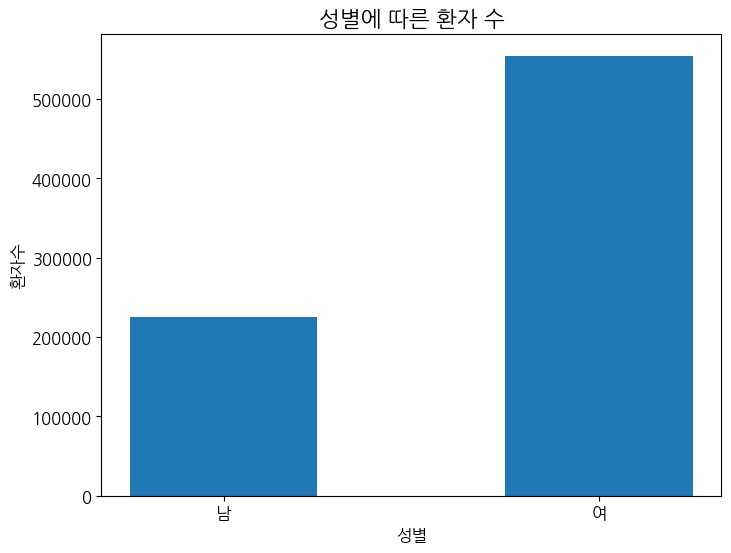

In [31]:

plt.figure(figsize=(8, 6))
plt.bar(sex_total_group['성별'], sex_total_group['환자수'], width=0.5)
plt.title('성별에 따른 환자 수', fontsize=16)
plt.xlabel('성별', fontsize=12)
plt.ylabel('환자수', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()
# 성별에 따른 환자수 그래프 시각화